<a href="https://colab.research.google.com/github/biswas-neelesh96/Wednesday-Night-Wars/blob/master/Wednesday_Night_Wars_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wednesday Night Wars
How many of you love watching professional wrestling? Who doesn't love to watch Roman Reigns or John Cena to wrestle in WWE now? In this article cum Python notebook, I'm here to present you the Wednesday Night Wars happening in this pro-wrestling industry.
In brief, **Wednesday Night Wars** is actually an ongoing period of battle of ***Nielsen Ratings*** between two weekly pro-wrestling shows **WWE NXT** and **AEW Dynamite** started from 2nd October 2019, which also marks the debut episode of *Dynamite*. With the help of *Python* & *Data Visualization*, we will discuss about 

To begin first, we import the libraries:

1) Pandas

2) Numpy

3) Matplotlib

4) Seaborn

5) Datetime

## 1) Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
print('Setup Complete')

Setup Complete


## 2) Show the ratings of last 5 weeks

In [2]:
wnw_data=pd.read_csv('WNW.csv', index_col='Date', parse_dates=True)
wnw_data.tail()

,WWE NXT,AEW Dynamite
Date,,
2020-09-30,732000,866000
2020-10-07,639000,753000
2020-10-14,651000,826000
2020-10-21,644000,753000
2020-10-28,876000,781000


## 3) Remove any empty columns or columns with empty cells (if any)

In [3]:
cols_with_missing = [col for col in wnw_data.columns
                     if wnw_data[col].isnull().any()]
reduced_wnw_data = wnw_data.drop(cols_with_missing, axis=1)
reduced_wnw_data.tail()

,WWE NXT,AEW Dynamite
Date,,
2020-09-30,732000,866000
2020-10-07,639000,753000
2020-10-14,651000,826000
2020-10-21,644000,753000
2020-10-28,876000,781000


## 4) Comparison of both the shows 

### a) in the same graph

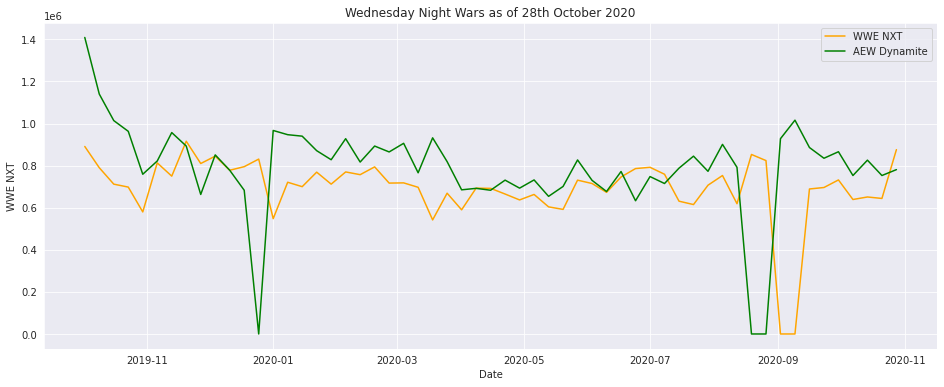

In [4]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,6))
plt.title('Wednesday Night Wars as of 28th October 2020')
sns.lineplot(data=reduced_wnw_data['WWE NXT'], label='WWE NXT', color='orange')
sns.lineplot(data=reduced_wnw_data['AEW Dynamite'], label='AEW Dynamite', color='green')

### b) in individual graphs

#### i) AEW Dynamite

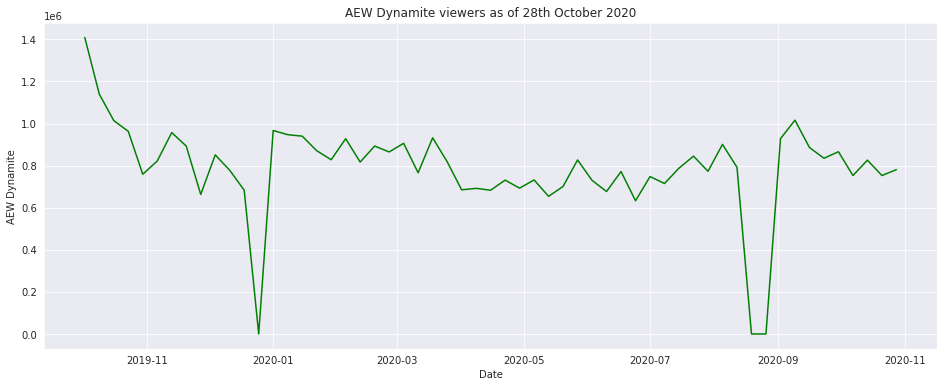

In [7]:
plt.figure(figsize=(16,6))
plt.title('AEW Dynamite viewers as of 28th October 2020')
sns.lineplot(data=reduced_wnw_data['AEW Dynamite'], color='green')

#### ii) WWE NXT

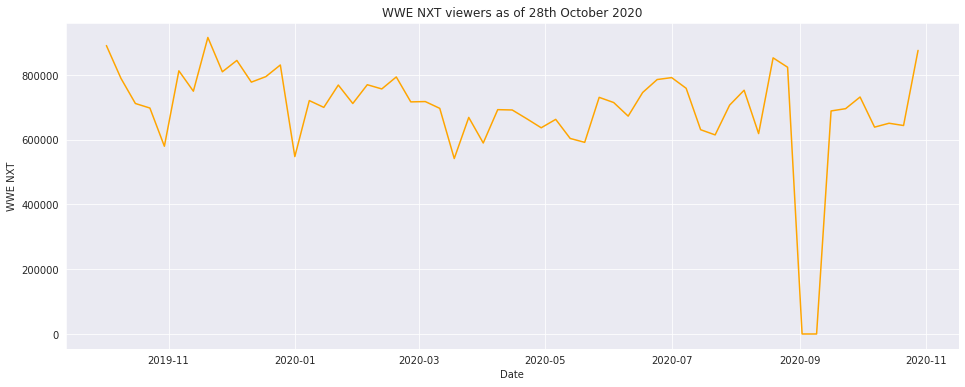

In [8]:
plt.figure(figsize=(16,6))
plt.title('WWE NXT viewers as of 28th October 2020')
sns.lineplot(data=reduced_wnw_data['WWE NXT'], color='orange')

## 5) Correcting the Date representation

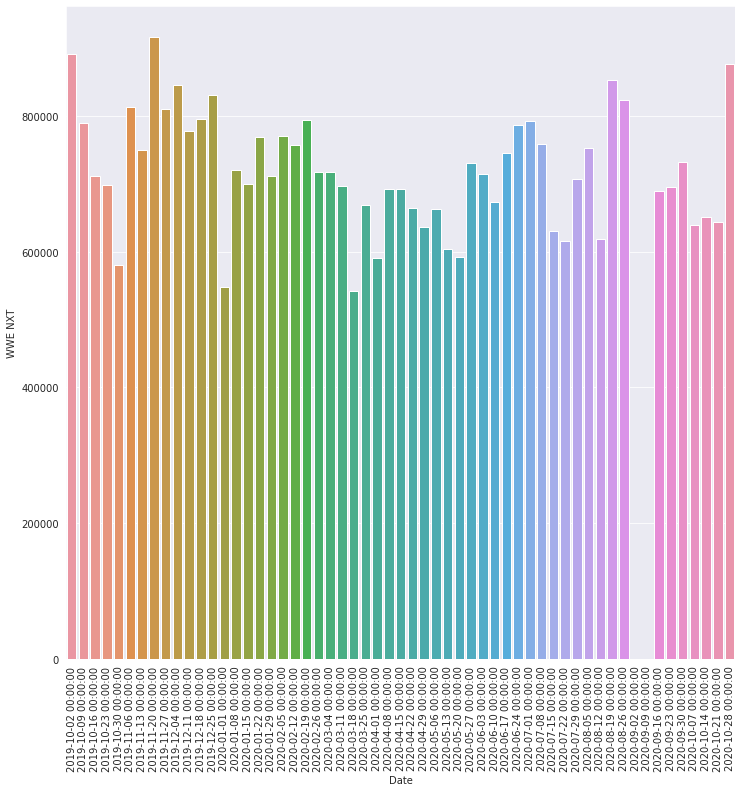

In [11]:
plt.figure(figsize=(12,12))
plt.xticks(rotation=90) 
sns.barplot(x=reduced_wnw_data.index, y=reduced_wnw_data['WWE NXT'])

If we look the above plot carefully. We see that the index is having the **Time stamp** as well, so we need to remove that as the time displayed is not right.

### a) Extracting Date from Datetime 

**NOTE: Datatype will be still Datetime. This step is just to show you how we need to represent the dates**

In [13]:
reduced_wnw_data.index=pd.to_datetime(reduced_wnw_data.index)
reduced_wnw_data.index

DatetimeIndex(['2019-10-02', '2019-10-09', '2019-10-16', '2019-10-23',
               '2019-10-30', '2019-11-06', '2019-11-13', '2019-11-20',
               '2019-11-27', '2019-12-04', '2019-12-11', '2019-12-18',
               '2019-12-25', '2020-01-01', '2020-01-08', '2020-01-15',
               '2020-01-22', '2020-01-29', '2020-02-05', '2020-02-12',
               '2020-02-19', '2020-02-26', '2020-03-04', '2020-03-11',
               '2020-03-18', '2020-03-25', '2020-04-01', '2020-04-08',
               '2020-04-15', '2020-04-22', '2020-04-29', '2020-05-06',
               '2020-05-13', '2020-05-20', '2020-05-27', '2020-06-03',
               '2020-06-10', '2020-06-17', '2020-06-24', '2020-07-01',
               '2020-07-08', '2020-07-15', '2020-07-22', '2020-07-29',
               '2020-08-05', '2020-08-12', '2020-08-19', '2020-08-26',
               '2020-09-02', '2020-09-09', '2020-09-16', '2020-09-23',
               '2020-09-30', '2020-10-07', '2020-10-14', '2020-10-21',
      

### b) Converting the datatype from Datetime to Date (Creating a separate Dataframe)

In [14]:
Tdate = reduced_wnw_data.index.to_series().apply(lambda x: dt.datetime.strftime(x, '%d-%b-%Y'))
Tdate.tail()

Date
2020-09-30    30-Sep-2020
2020-10-07    07-Oct-2020
2020-10-14    14-Oct-2020
2020-10-21    21-Oct-2020
2020-10-28    28-Oct-2020
Name: Date, dtype: object

In [15]:
TDate= pd.DataFrame(Tdate)
TDate.tail()

,Date
Date,
2020-09-30,30-Sep-2020
2020-10-07,07-Oct-2020
2020-10-14,14-Oct-2020
2020-10-21,21-Oct-2020
2020-10-28,28-Oct-2020


### c) Add the Dataframe to the main Dataframe 

In [16]:
reduced_wnw_data1=reduced_wnw_data.assign(Telecasting_Date=Tdate)
reduced_wnw_data1.tail()

,WWE NXT,AEW Dynamite,Telecasting_Date
Date,,,
2020-09-30,732000,866000,30-Sep-2020
2020-10-07,639000,753000,07-Oct-2020
2020-10-14,651000,826000,14-Oct-2020
2020-10-21,644000,753000,21-Oct-2020
2020-10-28,876000,781000,28-Oct-2020


### d) Representing the plots after correction (both shows in individual plots)

#### i) WWE NXT

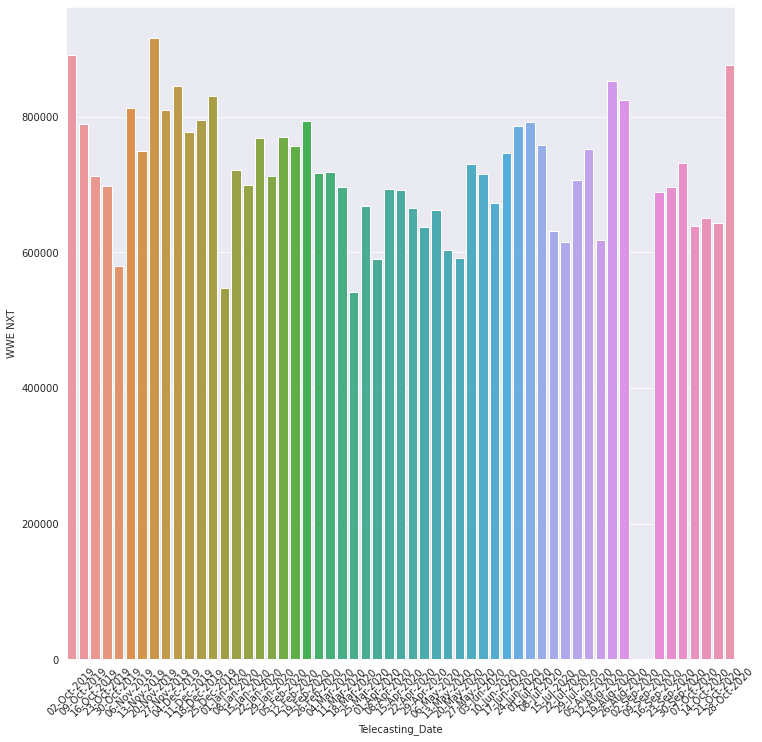

In [17]:
plt.figure(figsize=(12,12))
plt.xticks(rotation=45) 
sns.barplot(x=reduced_wnw_data1['Telecasting_Date'], y=reduced_wnw_data1['WWE NXT'])

#### ii) AEW Dynamite

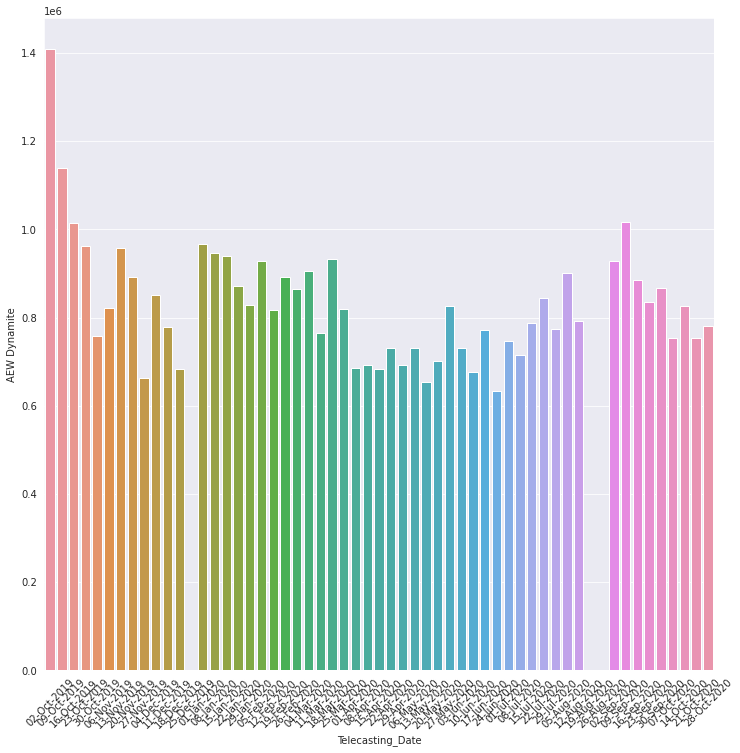

In [18]:
plt.figure(figsize=(12,12))
plt.xticks(rotation=45) 
sns.barplot(x=reduced_wnw_data1['Telecasting_Date'], y=reduced_wnw_data1['AEW Dynamite'])

## 6) Analyzing both the shows date-wise 

### a) Transposing the Dataframe 

In [19]:
df1 = reduced_wnw_data1.transpose()
df1 = df1.iloc[:2]
df1

Date,2019-10-02,2019-10-09,2019-10-16,2019-10-23,2019-10-30,2019-11-06,2019-11-13,2019-11-20,2019-11-27,2019-12-04,2019-12-11,2019-12-18,2019-12-25,2020-01-01,2020-01-08,2020-01-15,2020-01-22,2020-01-29,2020-02-05,2020-02-12,2020-02-19,2020-02-26,2020-03-04,2020-03-11,2020-03-18,2020-03-25,2020-04-01,2020-04-08,2020-04-15,2020-04-22,2020-04-29,2020-05-06,2020-05-13,2020-05-20,2020-05-27,2020-06-03,2020-06-10,2020-06-17,2020-06-24,2020-07-01,2020-07-08,2020-07-15,2020-07-22,2020-07-29,2020-08-05,2020-08-12,2020-08-19,2020-08-26,2020-09-02,2020-09-09,2020-09-16,2020-09-23,2020-09-30,2020-10-07,2020-10-14,2020-10-21,2020-10-28
WWE NXT,891000,790000,712000,698000,580000,813000,750000,916000,810000,845000,778000,795000,831000,548000,721000,700000,769000,712000,770000,757000,794000,717000,718000,697000,542000,669000,590000,693000,692000,665000,637000,663000,604000,592000,731000,715000,673000,746000,786000,792000,759000,631000,615000,707000,753000,619000,853000,824000,0,0,689000,696000,732000,639000,651000,644000,876000
AEW Dynamite,1409000,1140000,1014000,963000,759000,822000,957000,893000,663000,851000,778000,683000,0,967000,947000,940000,871000,828000,928000,817000,893000,865000,906000,766000,932000,819000,685000,692000,683000,731000,693000,732000,654000,701000,827000,730000,677000,772000,633000,748000,715000,788000,845000,773000,901000,792000,0,0,928000,1016000,886000,835000,866000,753000,826000,753000,781000


### b) Showing the Pie-Chart using the transposed dataframe

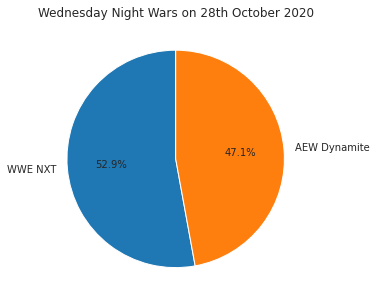

In [22]:
#here user needs to enter the telecasted date himself/herself (refer the csv file)
df2 = df1['2020-10-28']  
df2.plot(kind = 'pie', figsize = (15,5), autopct='%1.1f%%', startangle=90)
#Date may vary so change here too accordingly
plt.title('Wednesday Night Wars on 28th October 2020') 
plt.ylabel(" ")
plt.show()

### c) Showing the Bar-Chart using the transposed dataframe

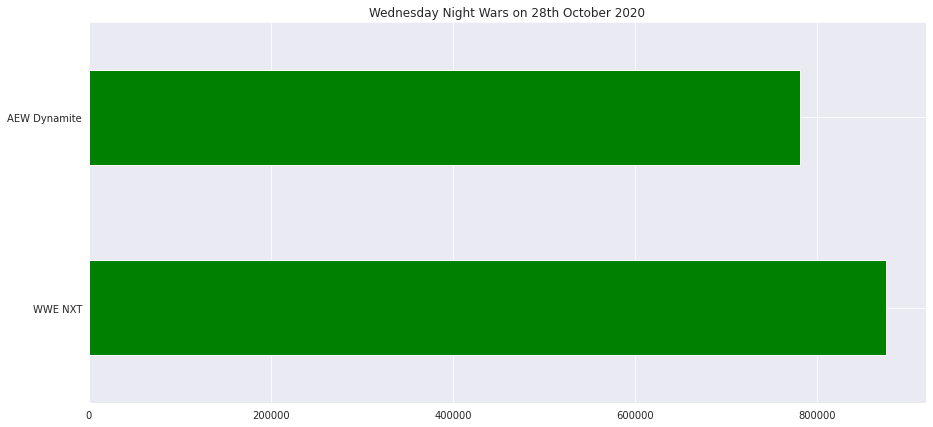

In [23]:
#here user needs to enter the telecasted date himself/herself (refer the csv file)
df3=df1['2020-10-28']
df3.plot(kind = 'barh', figsize = (15,7), color='green')
#Date may vary so change here too accordingly
plt.title('Wednesday Night Wars on 28th October 2020')
plt.show()

## 7) Representing Distplot of both the shows

### a) in the same graph

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


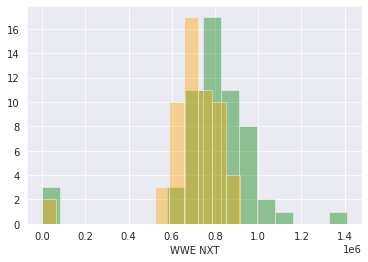

In [24]:
sns.distplot(a=reduced_wnw_data1['AEW Dynamite'], kde=False, color='green')
sns.distplot(a=reduced_wnw_data1['WWE NXT'], kde=False, color='orange')

### b) in individual graphs

#### i) AEW Dynamite

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


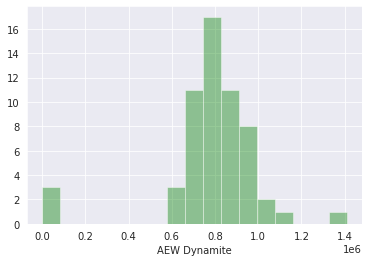

In [25]:
sns.distplot(a=reduced_wnw_data1['AEW Dynamite'], kde=False, color='green')

#### ii) WWE NXT

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


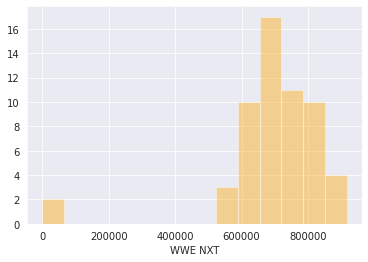

In [ ]:
sns.distplot(a=reduced_wnw_data1['WWE NXT'], kde=False, color='orange')

## 8) Representing KDE Plot of both the shows

### a) in the same graph

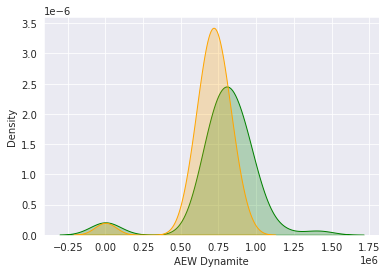

In [26]:
sns.kdeplot(data=reduced_wnw_data1['AEW Dynamite'], shade=True, color='green')
sns.kdeplot(data=reduced_wnw_data1['WWE NXT'], shade=True, color='orange')

### b) in individual graphs

#### i) AEW Dynamite

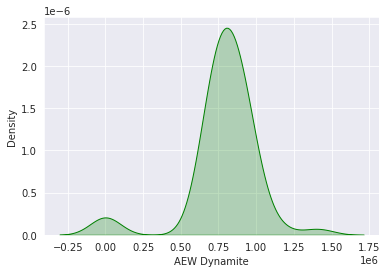

In [27]:
sns.kdeplot(data=reduced_wnw_data1['AEW Dynamite'], shade=True, color='green')  

#### ii) WWE NXT

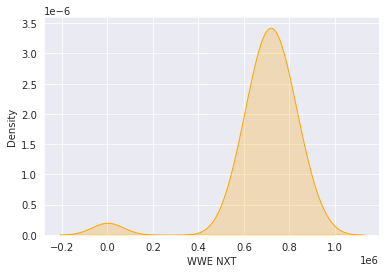

In [28]:
sns.kdeplot(data=reduced_wnw_data1['WWE NXT'], shade=True, color='orange')

## 9) Represeting Jointplot of both the shows

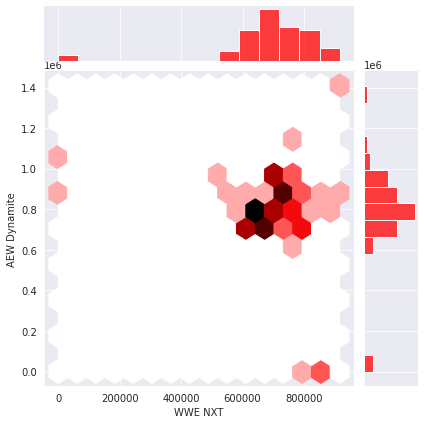

In [37]:
sns.jointplot(x=reduced_wnw_data1['WWE NXT'], y=reduced_wnw_data1['AEW Dynamite'], kind= "hex", color='red')

## 10) Swarmplot Representation

### a) Creating three more columns for **Swarmplot:**

**i) Winner Show:** Comparing the Winner of the show episode-wise (date-wise).

**ii) Winner Views:** Highlighting the views of only the *Winner Show.* 

**iii) Difference:** Highlighting the difference between the views of both the shows in the same date

In [29]:
#creating Winner Show 
reduced_wnw_data1.loc[reduced_wnw_data1["WWE NXT"]<reduced_wnw_data1["AEW Dynamite"], "Winner Show"]="AEW Dynamite"
reduced_wnw_data1.loc[reduced_wnw_data1["WWE NXT"]>reduced_wnw_data1["AEW Dynamite"], "Winner Show"]="WWE NXT"
reduced_wnw_data1.loc[reduced_wnw_data1["WWE NXT"]==reduced_wnw_data1["AEW Dynamite"], "Winner Show"]="Tie"
reduced_wnw_data1.loc[reduced_wnw_data1["WWE NXT"]==0, "Winner Show"]="Not Contested"
reduced_wnw_data1.loc[reduced_wnw_data1["AEW Dynamite"]==0, "Winner Show"]="Not Contested"

#creating Winner Views
reduced_wnw_data1.loc[reduced_wnw_data1["WWE NXT"]<=reduced_wnw_data1["AEW Dynamite"], "Winner Views"]=reduced_wnw_data1["AEW Dynamite"]
reduced_wnw_data1.loc[reduced_wnw_data1["WWE NXT"]>reduced_wnw_data1["AEW Dynamite"], "Winner Views"]=reduced_wnw_data1["WWE NXT"]

#creating Difference
reduced_wnw_data1.loc[reduced_wnw_data1["WWE NXT"]<=reduced_wnw_data1["AEW Dynamite"], "Difference"]=reduced_wnw_data1["AEW Dynamite"]-reduced_wnw_data1['WWE NXT']
reduced_wnw_data1.loc[reduced_wnw_data1["WWE NXT"]>reduced_wnw_data1["AEW Dynamite"], "Difference"]=reduced_wnw_data1["WWE NXT"]-reduced_wnw_data1['AEW Dynamite']
reduced_wnw_data1

,WWE NXT,AEW Dynamite,Telecasting_Date,Winner Show,Winner Views,Difference
Date,,,,,,
2019-10-02,891000,1409000,02-Oct-2019,AEW Dynamite,1409000.0,518000.0
2019-10-09,790000,1140000,09-Oct-2019,AEW Dynamite,1140000.0,350000.0
2019-10-16,712000,1014000,16-Oct-2019,AEW Dynamite,1014000.0,302000.0
2019-10-23,698000,963000,23-Oct-2019,AEW Dynamite,963000.0,265000.0
2019-10-30,580000,759000,30-Oct-2019,AEW Dynamite,759000.0,179000.0
2019-11-06,813000,822000,06-Nov-2019,AEW Dynamite,822000.0,9000.0
2019-11-13,750000,957000,13-Nov-2019,AEW Dynamite,957000.0,207000.0
2019-11-20,916000,893000,20-Nov-2019,WWE NXT,916000.0,23000.0
2019-11-27,810000,663000,27-Nov-2019,WWE NXT,810000.0,147000.0


### b) Swarmplot

#### i) Winner Show vs Date

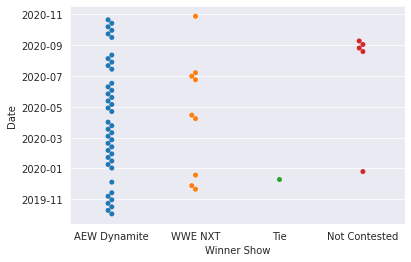

In [30]:
plt.figsize=(15,20)
sns.swarmplot(x=reduced_wnw_data1['Winner Show'],
              y=reduced_wnw_data1.index)

#### ii) Winner Show vs Winner Views

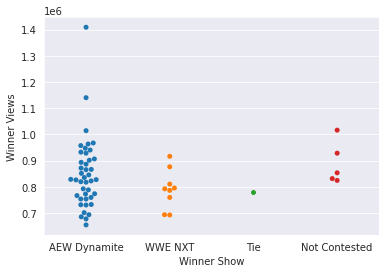

In [31]:
plt.figsize=(15,20)
sns.swarmplot(x=reduced_wnw_data1['Winner Show'],
              y=reduced_wnw_data1['Winner Views'])

#### iii) Winner Show vs Difference

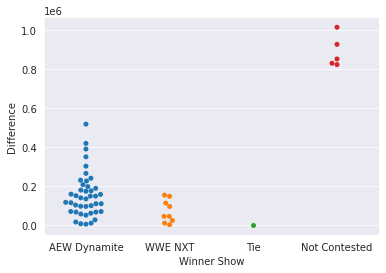

In [32]:
plt.figsize=(15,20)
sns.swarmplot(x=reduced_wnw_data1['Winner Show'],
              y=reduced_wnw_data1['Difference'])

## 11) Creating Pie-Chart of overall Wednesday Night Wars 

### a) Calculating the ratio between the Winners datewise using **Winner Show** column

In [38]:
win_percent = reduced_wnw_data1['Winner Show'].value_counts(normalize=True)
win_percent

AEW Dynamite     0.736842
WWE NXT          0.157895
Not Contested    0.087719
Tie              0.017544
Name: Winner Show, dtype: float64

### b) Making a separate Dataframe using the calculations

In [39]:
Win_Percent= pd.DataFrame(win_percent)
Win_Percent

,Winner Show
AEW Dynamite,0.736842
WWE NXT,0.157895
Not Contested,0.087719
Tie,0.017544


### c) Renaming **Winner Show** column to **Win Percentage**

In [40]:
Win_Percent.rename({'Winner Show':'Win Percentage'},  axis='columns', inplace=True)
Win_Percent

,Win Percentage
AEW Dynamite,0.736842
WWE NXT,0.157895
Not Contested,0.087719
Tie,0.017544


### d) Forming the Pie-Chart 

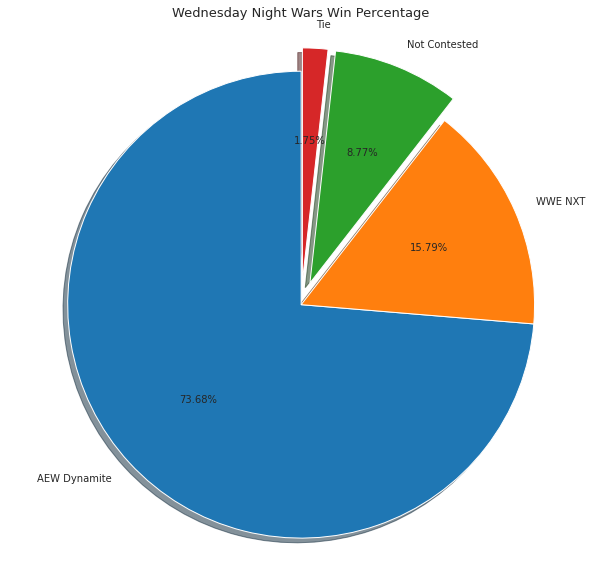

In [59]:
exp = (0, 0, 0.1, 0.1)
fig1, d1=plt.subplots(figsize=(10,10))
d1.pie(Win_Percent['Win Percentage'], explode=exp, labels=Win_Percent.index, autopct='%1.2f%%', startangle=90, shadow=True)
d1.axis('equal')
plt.title('Wednesday Night Wars Win Percentage', size=13)
plt.ylabel(" ")
plt.show()